In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")

In [4]:
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [5]:
#drop unnecessary columns
df_index.drop(columns=["Unnamed: 0", "year",	"month"	], axis=1, inplace=True)

In [6]:
df_index

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [7]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

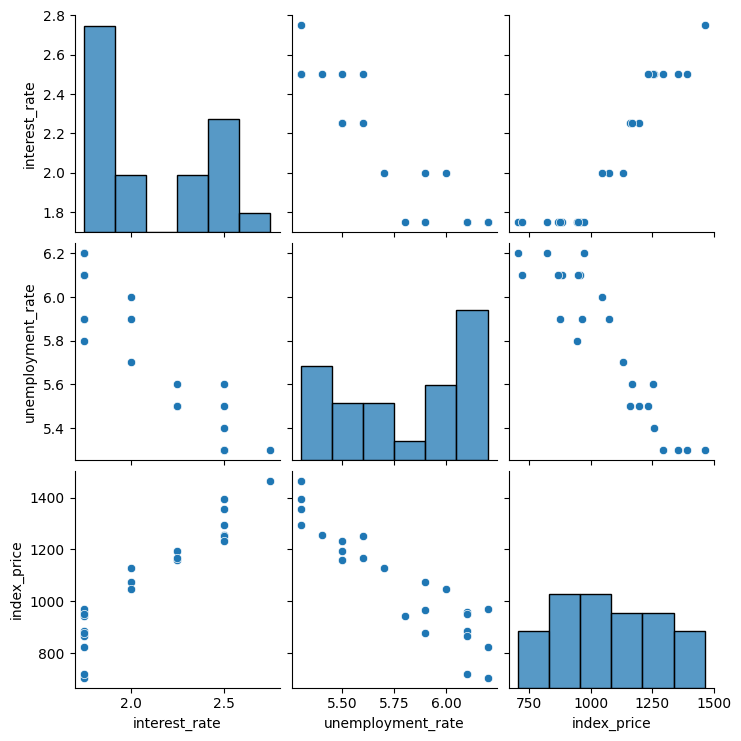

In [8]:
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


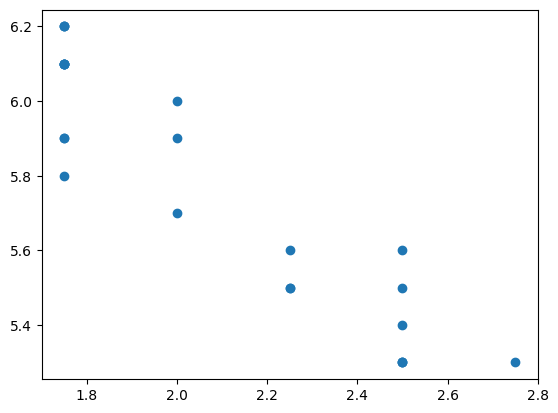

In [10]:
plt.scatter(df_index['interest_rate'],df_index["unemployment_rate"])

In [14]:
X = df_index[['interest_rate', 'unemployment_rate']]  # select features as columns
y = df_index['index_price']  # select target column

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

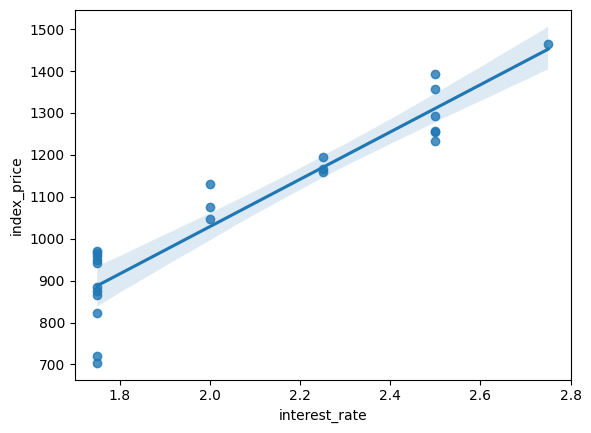

In [18]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [22]:
X_test = scaler.fit_transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train,scoring='neg_mean_squared_error', cv=3)

In [26]:
scores

array([-4304.75412833, -7608.56499271, -5108.77588052])

In [28]:
import numpy as np
np.mean(scores)

np.float64(-5674.031667186762)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [32]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 5952.207497480509
Mean Absolute Error: 64.74722105636553


In [33]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 77.1505508566239


In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8507000324705949

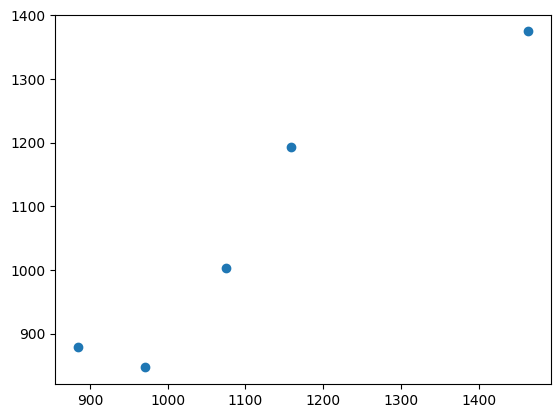

In [36]:
## Assumptions
plt.scatter(y_test, y_pred)

In [38]:
residuals = y_test - y_pred
residuals

8     -33.920684
16    124.309127
0      89.464440
18      4.386140
11     71.655715
Name: index_price, dtype: float64